In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [3]:
data_path = '../data/raw/credit_risk_dataset.csv'

df = pd.read_csv(data_path)

In [134]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
column_to_move = df.pop("loan_status")

In [17]:
df.insert(11, "loan_status", column_to_move)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [20]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [36]:
rows_with_nan = df[df.isna().any(axis=1)]

In [45]:
rows_with_nan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,0.42,N,4,1
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,0.38,Y,4,1
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0.13,N,4,0
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0.15,Y,3,0
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,0.04,N,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,0.29,Y,28,1
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0.22,Y,19,0
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0.25,N,28,0
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0.13,N,23,0


In [76]:
df[['person_age', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']].median()

person_age                      26.00
loan_amnt                     8000.00
loan_int_rate                   10.99
loan_percent_income              0.15
cb_person_cred_hist_length       4.00
dtype: float64

<Axes: >

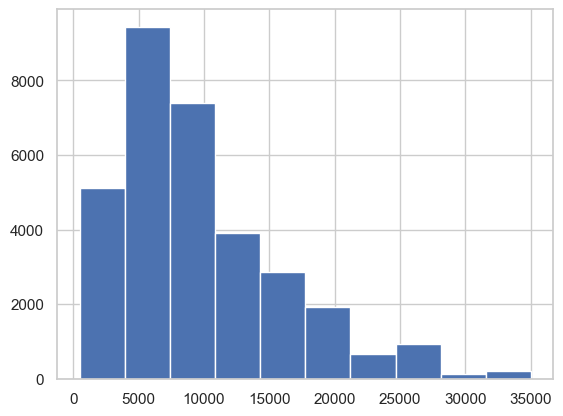

In [78]:
df['loan_amnt'].hist()

<Axes: >

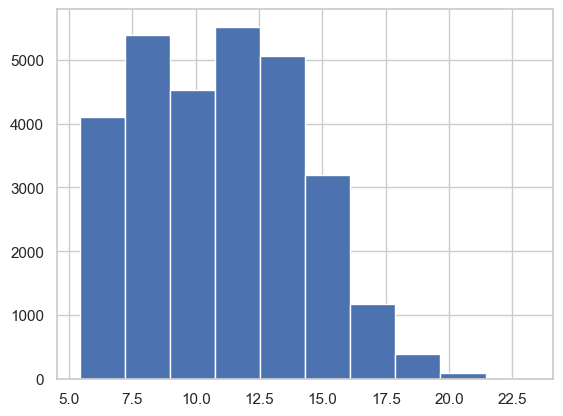

In [83]:
df['loan_int_rate'].hist()

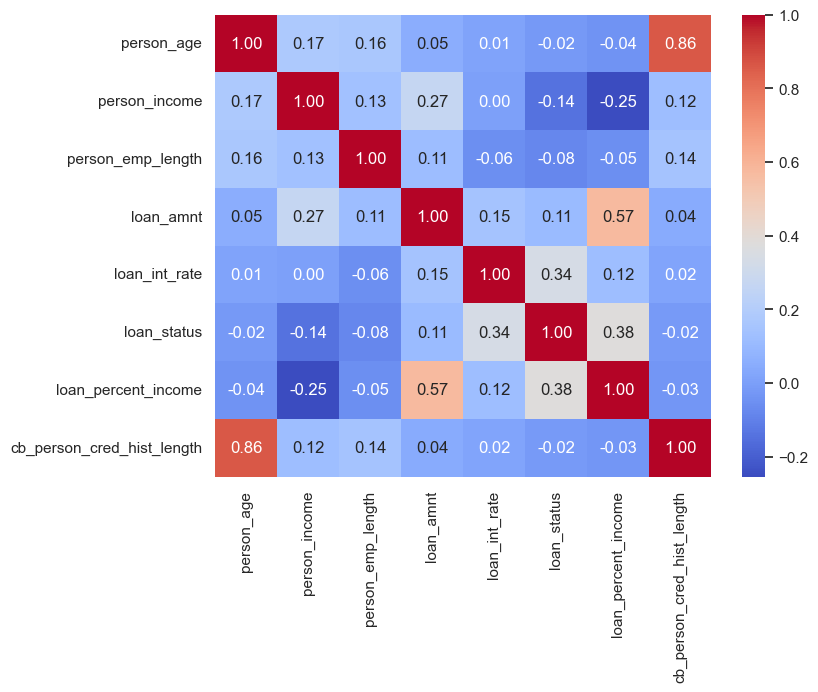

In [135]:
# Матрица кореляций
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

# Тепловая карта
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [120]:
new_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,28631.000000,2.863100e+04,28631.000000,28631.000000,28631.000000,28631.000000,28631.000000,28631.000000
mean,27.710174,6.642551e+04,4.780413,9655.319409,11.039825,0.169491,5.792917,0.216618
std,6.163125,5.154808e+04,4.035653,6327.908887,3.229398,0.106362,4.035769,0.411948
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000,0.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [139]:
df = df.rename(columns={
    'person_age':'age',
    'person_income':'year_income',
    'person_home_ownership':'home_status',
    'person_emp_length':'work_experience',
    'loan_intent':'credit_purpose',
    'loan_grade':'credit_grade',
    'loan_amnt':'credit_amount',
    'loan_int_rate':'percentage_rate',
    'loan_percent_income':'credit_percent_income',
    'cb_person_default_on_file':'cb_person_default',
    'loan_status':'credit_status'
})

In [129]:
new_df.head()

,age,year_income,home_status,work_experience,credit_purpose,credit_grade,credit_amount,percentage_rate,credit_percent_income,cb_person_default,cb_person_cred_hist_length,credit_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1


In [140]:
df.describe()

,age,year_income,work_experience,credit_amount,percentage_rate,credit_status,credit_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [142]:
df.to_csv('eda_credit_risk_data', index=False)

In [6]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64